## **Notebook to make predictions with reprocessed Yoneda data and EFLUX2** 

By Christina Schenk and Garrett Roell

Tested on biodesign_3.7 kernel on jprime

### EFLUX2 predictions and evaluations
This notebook predicts fluxes for R. opacus cultures growing with glucose. The data was published in [Yoneda (2016)](https://academic.oup.com/nar/article/44/5/2240/2465306).



#### **Data Labels**:

#### Yoneda transcriptomics data: 
* WT 1.0 g/L Glucose, 0.05g/L ammonium sulfate (**WT-LN-G**) (3 trials)

#### Combined with Rhiannon 2018 metabolomics and OD data:
* Metabolomics and OD data for WT Glucose (before **WT-G** but now **WT-LN-G**)
                                               

### Method: 
<ol>
<li>Predict fluxes with EFLUX2</li>
<li>Compare predictions with 13CMFA: Scatter plots and flux maps</li>
<li>Load file with observed growth rates (Notebook E)</li>
<li>Save growth rate predictions to csv file</li>
</ol>



##### **Import python packages**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import cobra
import scipy.stats
#import cplex
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
import matplotlib.cm as cm

from edd_utils import login, export_study, export_metadata

from sklearn.metrics import r2_score

SourceDir = '../src'
sys.path.append(SourceDir)
from ensemblemethods import EFlux2
from utils import *

output_dir = '../plots/CPM/'
from plot import *

##### **Load data**

In [2]:
# # Study to Download
# study_slug = 'biodesign_yoneda_set3_reprocessed'
# # EDD server
# edd_server = 'public-edd.jbei.org'
# user       = 'schenkch'

In [3]:
# session = login(edd_server=edd_server, user=user)

# df = export_study(session, study_slug, edd_server=edd_server)
# #df.head()

##### **Filter transcriptomics data from all EDD data into different dataframes**

In [4]:
# df_Trans = df[df['Protocol'].str.contains('Transcriptomics')]
# df_Trans.head()

In [5]:
# df_Trans = transcript_measurements['glucose_cpm'] #fpkm
# scratch/OpacusBiodesign/transcript_data/csv/henson_CPM_melted.csv
df_trans = pd.read_csv('../transcript_data/csv/henson_CPM_melted.csv')
df_trans.head()

,Line Name,Measurement Type,Time,Count,Units
0,WT-M-R1,WP_005263480_1,20,19.003420,CPM
1,WT-M-R2,WP_005263480_1,20,16.800668,CPM
2,WT-M-R3,WP_005263480_1,20,12.955220,CPM
3,WT-M-R1,WP_005263480_1,32,10.984975,CPM
4,WT-M-R2,WP_005263480_1,32,9.520107,CPM


In [6]:
# time could be 10 or 13
df_trans = df_trans[df_trans['Time'] == 13 ]
df_trans.head()

,Line Name,Measurement Type,Time,Count,Units
9,WT-Glu-R1,WP_005263480_1,13,15.584245,CPM
10,WT-Glu-R2,WP_005263480_1,13,22.444427,CPM
11,WT-Glu-R3,WP_005263480_1,13,20.433310,CPM
35,PVHG-Glu-R1,WP_005263480_1,13,22.993761,CPM
36,PVHG-Glu-R2,WP_005263480_1,13,23.797461,CPM


##### **Load Genome Scale Model**

In [7]:
model = cobra.io.read_sbml_model("../GSMs/Ropacus_annotated.xml")

#### **1. EFLUX2 Predictions for Wild type**

In [8]:
spotsol, spotsol_std = spot_pred_for_three_reps(model, df_trans, 'WT-Glu-R1', 'WT-Glu-R2','WT-Glu-R3', 'glucose')

running first replicate


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_glc__D_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf}

running second replicate


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_glc__D_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf}

running first third


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_glc__D_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf}

In [9]:
spotsol.loc['Growth_Glucose',:]

fluxes   -2.512908e-12
Name: Growth_Glucose, dtype: float64

##### **Save solution to data frame**

In [11]:
spotsoldf = pd.DataFrame(spotsol, columns=['fluxes'])
spotsolstddf = pd.DataFrame(spotsol_std, columns=['stds'])

#### **2. Plot solutions: Comparison of EFLUX2 WT predictions and 13c measurements**

##### **Load 13cdata**

#####  **Get 13C MFA measured fluxes for glucose**

In [12]:
glucose_fluxes = pd.read_csv('../13C_flux_data/13C_glucose_flux_data.csv')

# Remove rows that do not have a mapping to the GSM
# glucose_fluxes.dropna(inplace=True)
glucose_fluxes.dropna(subset = ["Forward Reactions"], inplace=True)
print(f'There are {len(glucose_fluxes)} fluxes that can be compared between the MFA and FBA')
glucose_fluxes

There are 44 fluxes that can be compared between the MFA and FBA


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Substrate Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91
5,EMP Pathway,GAPD or reverse_GAPDi_nadp,"GAP <-> G1,3P","(-220, 30)",86.56,82.61,88.84
6,EMP Pathway,reverse_PGK,"G1,3P <-> 3PG + ATP + NADH","(-220, -55)",86.56,82.61,88.84
7,EMP Pathway,reverse_PGM,3PG <-> 2PG,"(-220, -135)",78.52,71.65,81.26
8,EMP Pathway,ENO,2PG <-> PEP,"(-220, -215)",78.52,71.65,81.26
9,EMP Pathway,ACMANApts or reverse_PPS or PYK or FRUptspp or...,PEP <-> Pyr + ATP,"(-220, -295)",19.02,-10.89,75.15


##### **Add Glucose EFLUX2 flux values to phenol fluxes dataframe**

In [13]:
obspred_fluxes = add_pred_fluxes_to_13c_df(glucose_fluxes, spotsoldf, spotsolstddf, 'glucose', 'SPOT', 'WT')
# obspred_fluxes.to_csv('../13C_flux_data/obspredfluxes_Glucose_EFLUX2_CPM.csv', index=True, header= True)
obspred_fluxes.head()

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,SPOT WT Value,SPOT WT std Value
0,Substrate Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00,100.000000,15.805423
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42,89.420622,6.272692
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91,71.512334,6.953794
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91,71.512334,6.953794
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91,45.884152,7.166429


### **Plot EFLUX2 vs 13C MFA**

##### **Plot 13C MFA observations vs. EFLUX2 predictions**

##### Scatter plot: 13CMFA vs. EFLUX2

In [ ]:
# scatterplotcomp_obs_vs_pred(obspred_fluxes, substrate='glucose', method='E-Flux2', strain='WT')

##### **Plot 13C MFA observations vs. EFLUX2 predictions with confidence intervals**

##### Scatter plot with standard deviations: 13CMFA vs. EFLUX2

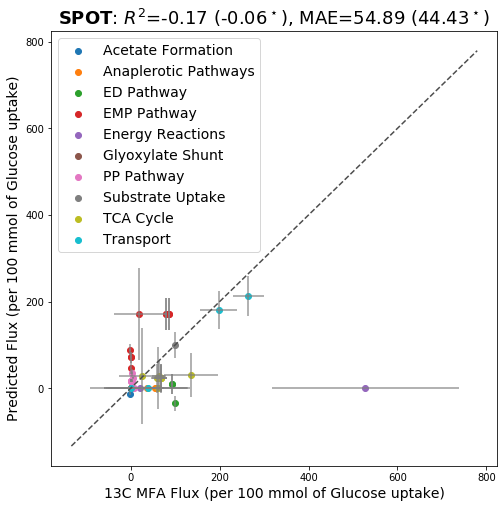

In [14]:
scatterplotcomp_obs_vs_pred_withstd(obspred_fluxes, substrate='glucose', method='SPOT', strain='WT')

#### **Glucose EFlux2 WT Flux Map**

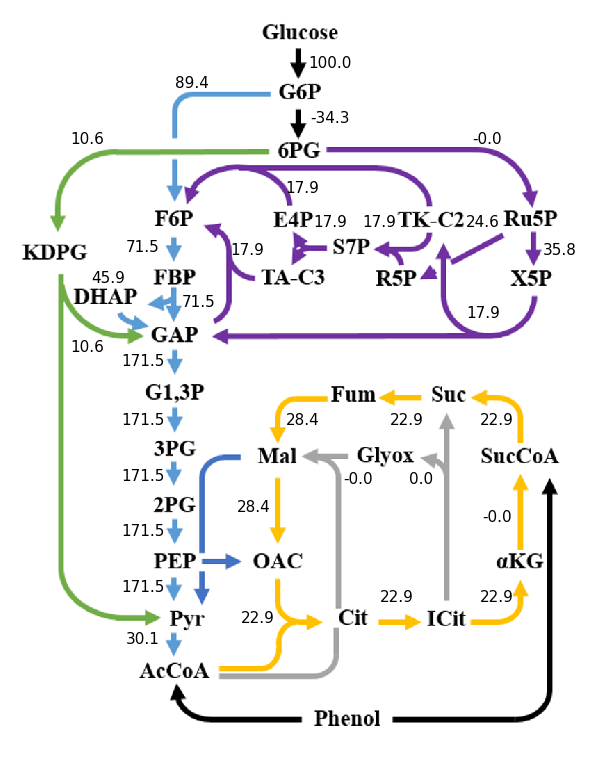

In [15]:
map_flux_results(obspred_fluxes, 'SPOT WT Value')

### **3. Load File with observed growth rates**

##### **Load observed growth rates and plot glucose growth rates**

In [16]:
consumption_and_growth_data = pd.read_csv('../consumption_and_growth_data/consumption_and_growth_data.csv', index_col=0)
consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785


##### **For comparison of predicted and observed growth rates: scale predicted growth rate by multiplying with (observed substrate uptake / predicted substrate uptake)**

In [17]:
scaledgrowthrate_wtlng = scale_growth_to_sub(
    eflux2soldf.loc['Growth_Glucose',:].values[0], 
    eflux2soldf.loc['EX_glc__D_e',:].values[0],
    consumption_and_growth_data.loc['WT-G', 'substrate consumption rate']
)

NameError: name 'eflux2soldf' is not defined

##### **Add scaled values to new dataframe**

In [18]:
allgrowthrates=pd.DataFrame(index=['WT-G'], columns=['Growth_Glucose_EFLUX2'], dtype=float)
allgrowthrates.at['WT-G','Growth_Glucose_EFLUX2'] = scaledgrowthrate_wtlng
allgrowthrates

NameError: name 'scaledgrowthrate_wtlng' is not defined

### **4. Save growth rate predictions to csv file**

##### **Save growth rates as csv file**

In [ ]:
allgrowthrates.to_csv('../consumption_and_growth_data/allgrowthratesGlucoseEFLUX2_CPM.csv', index=True, header= True)